## En este programa integramos el problema de N-cuerpos

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Constantes

In [2]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 
N   = 1000
m = np.ones(N)*1e10
m = m/N

### Generamos las condiciones iniciales

In [10]:
import random
import uniform_density as ud





range_r3  = np.linspace(0, 1/3., 2*N)
range_ct  = np.linspace(-1, 1, 2*N)
range_phi = np.linspace(0, 2*np.pi, 2*N)

r3  = np.random.choice(range_r3,  N, replace = True) #r**3
ct  = np.random.choice(range_ct,  N, replace = True) #cos(t)
phi = np.random.choice(range_phi, N, replace = True) #phi

st = np.sqrt(1. - ct**2) #sen(t)

xi = (r3*3)**(1/3.) * st * np.cos(phi)
yi = (r3*3)**(1/3.) * st * np.sin(phi)
zi = (r3*3)**(1/3.) * ct
    
# x, y, z = ud.dens(N)

xi = xi*100
yi = yi*100
zi = zi*100

vxi = np.zeros(N)
vyi = np.zeros(N)
vzi = np.zeros(N)




In [11]:
pos = np.ndarray([N,3])
pos[:,0] = xi
pos[:,1] = yi
pos[:,2] = zi

#print pos

vel = np.ndarray([N,3])
vel[:,0] = vxi
vel[:,1] = vyi
vel[:,2] = vzi

np.savetxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat', pos)
np.savetxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat', vel)
# print vel

In [47]:
posi = loadtxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat')
x = posi[:,0]
y = posi[:,1]
z = posi[:,2]

veli = loadtxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat')
vx = veli[:,0]
vy = veli[:,1]
vz = veli[:,2]

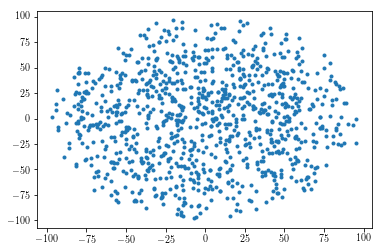

In [29]:
plot(x,y,'.')

In [5]:
#aceleraciones iniciales
# import fuerza as fz

# acel = fz.aceleraciones(eps,x,y,z,m)

In [48]:
from integradoresnc import *
ax,ay,az = integradores_modificado.aceleracion(eps,m,x,y,z)

In [11]:
# print numpy.__version__
# print numpy.__path__

1.13.3
['/home/omarioni/.conda/envs/conda-env/lib/python2.7/site-packages/numpy']


In [ ]:
# from integradores2 import *
# eps = 0.5
# a = integradores.a_str(eps,m,x,y,z)

### Acá definimos el paso y el numero de pasos

In [8]:
dt = 0.001  #paso
nit = 10000   #numero de pasos

# EULER

In [48]:
# import integradores as intg
# posf,velf,acf = intg.euler(eps,dt,nit,m,pos,vel,acel)

In [18]:
# from integradores_modificado import *
h = integradores_modificado.euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [49]:
# path = '/home/omarioni/mn2/_data/NC/euler/'

# xf = np.zeros((nit/10,len(m)))
# yf = np.zeros((nit/10,len(m)))
# zf = np.zeros((nit/10,len(m)))

# j=0
# for i in np.arange(0,nit,10):
    
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
#     xf[j,:] = posf[:,0]
#     yf[j,:] = posf[:,1]
#     zf[j,:] = posf[:,2]
    
#     j += 1

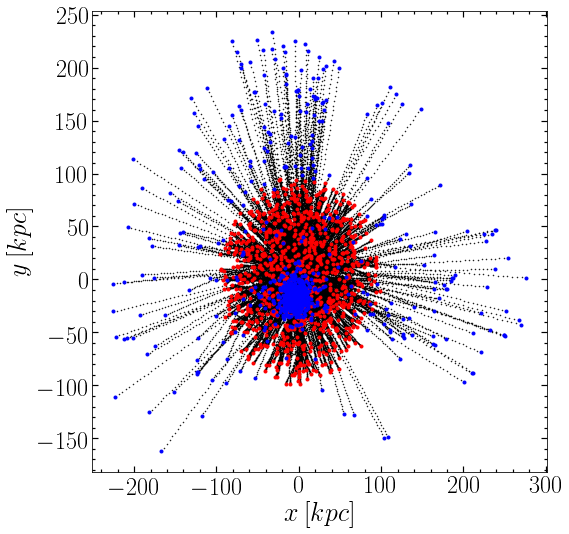

In [60]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# fig=plt.figure(1, figsize=(8,8))
# fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
# ax=fig.add_subplot(111)
# ax.plot(xf,yf,'.k', markersize=1)
# ax.plot(xf[0,:],yf[0,:],'.r')
# ax.plot(xf[-1,:],yf[-1,:],'.b')
# # ax.set_xlim(-apo-10,p+10)
# # ax.set_ylim(-a-10,a+10)
# ax.minorticks_on()
# ax.tick_params( labelsize=24)
# ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
# ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
# ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# # fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
# plt.show()

In [5]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_euler.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_euler.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(1001, 1000)


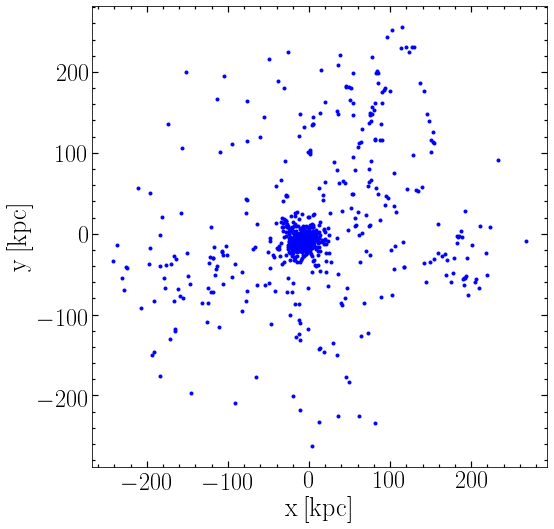

In [6]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
# ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.plot(xf[0,:],yf[0,:],'.r')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$\mathrm{x\:[kpc]}$', fontsize=26)
ax.set_ylabel(r'$\mathrm{y\:[kpc]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [11]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [12]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


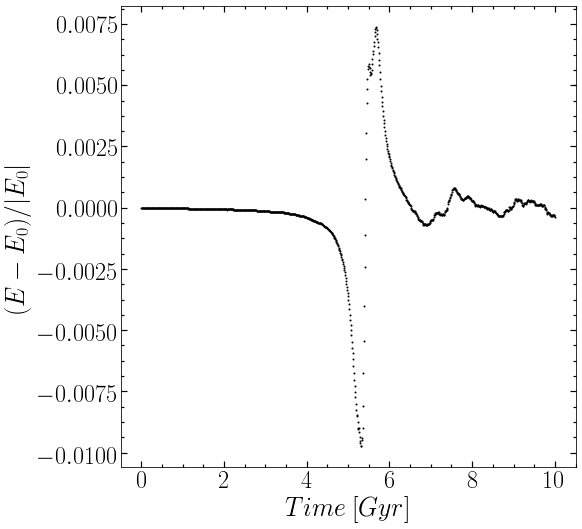

In [13]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

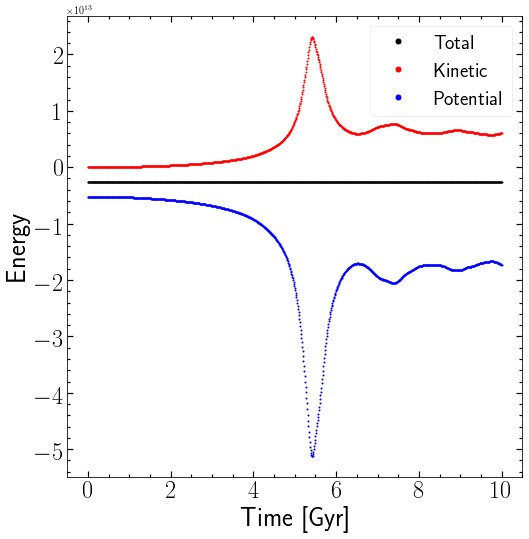

In [27]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel('Energy', fontsize=26)
ax.set_xlabel('Time [Gyr]',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [31]:
g = integradores_modificado.rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [32]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_runge.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)


(1001, 1000)


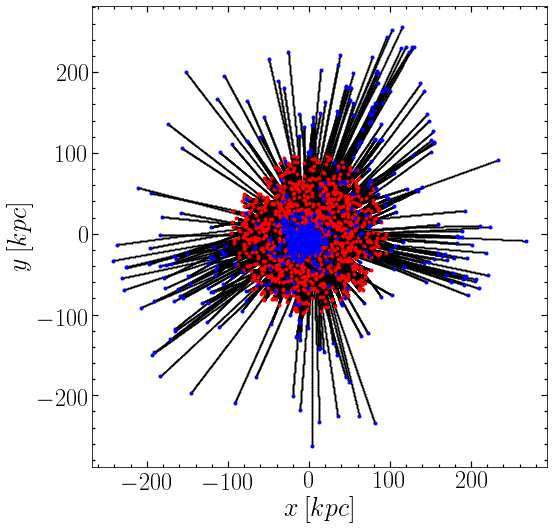

In [33]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [34]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [35]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


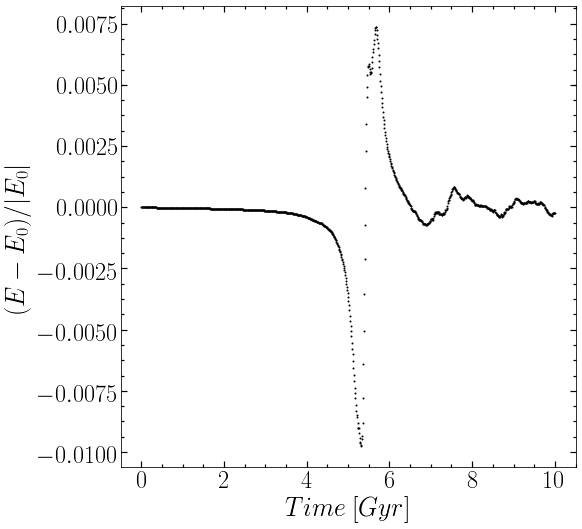

In [36]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

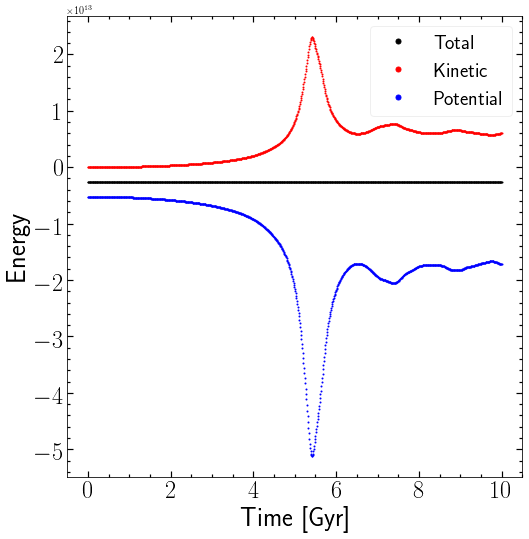

In [37]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel('Energy', fontsize=26)
ax.set_xlabel('Time [Gyr]',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - DKD

In [40]:
# from integradores_modificado import *
w = integradores_modificado.driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [41]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_DKD.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(1001, 1000)


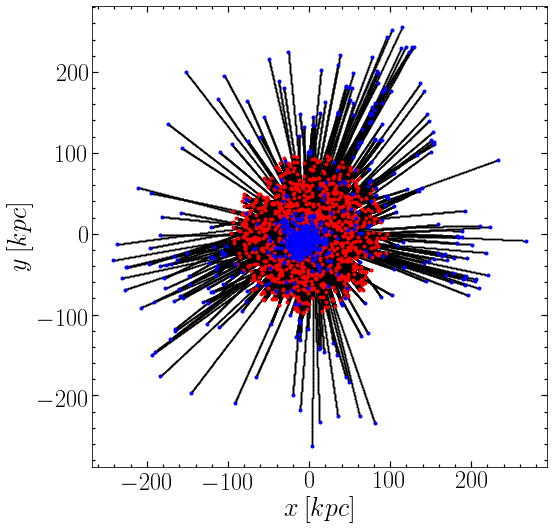

In [42]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [43]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [44]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


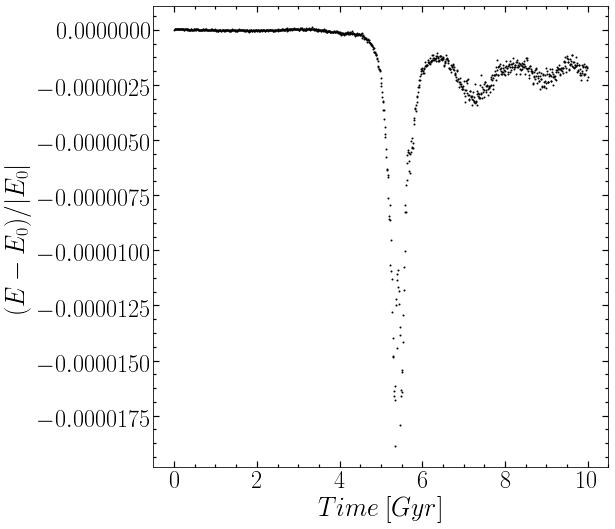

In [45]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

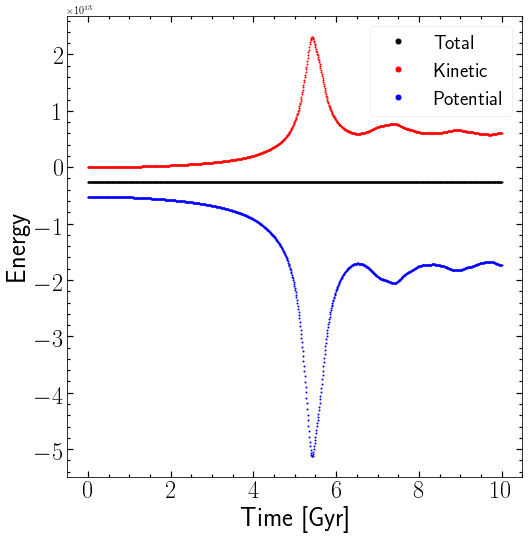

In [46]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel('Energy', fontsize=26)
ax.set_xlabel('Time [Gyr]',fontsize=26)
# ax.legend([Etot,Ecin,Epot], ['Energia total', 'Energia Cinetica', 'Energia potencial'])
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - KDK

In [50]:
# from integradores_modificado import *
s = integradores_modificado.kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [51]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_KDK.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(1001, 1000)


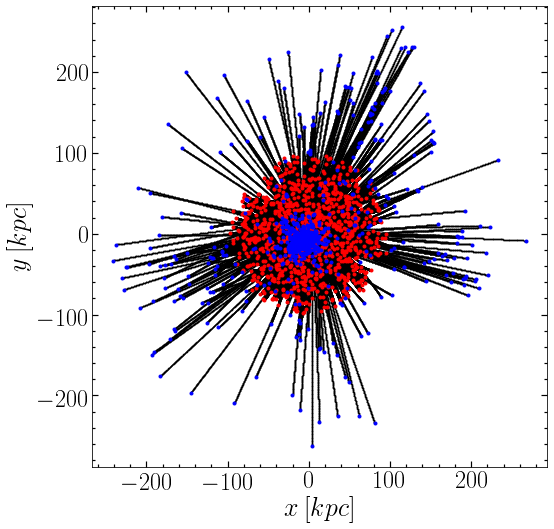

In [52]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [53]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [54]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


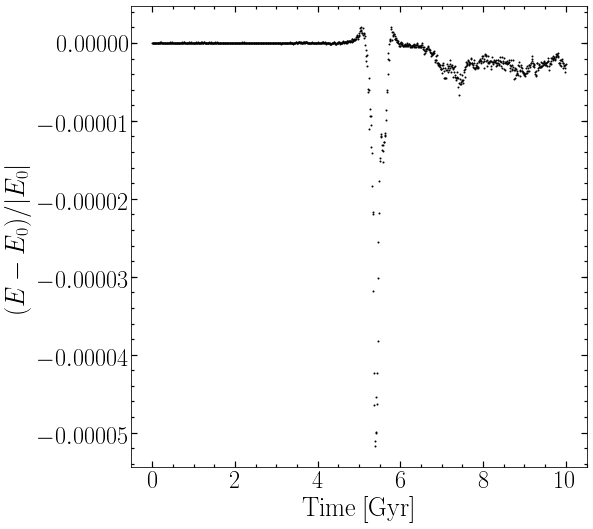

In [55]:
# from __future__ import unicode_literals

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

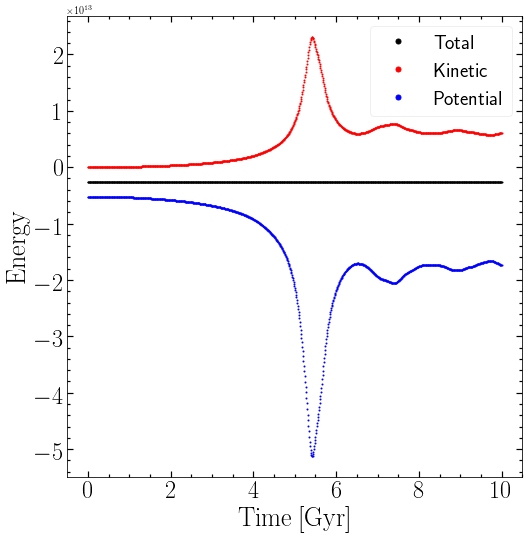

In [56]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel('$\mathrm{Energy}$', fontsize=26)
ax.set_xlabel('$\mathrm{Time\:[Gyr]}$',fontsize=26)
# ax.legend([Etot,Ecin,Epot], ['Energia total', 'Energia Cinetica', 'Energia potencial'])
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()